# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [73]:
import math
import sys

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [75]:
dataset = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz",sep='\t')
print(dataset.sample(10))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
390             5.6             0.850         0.05             1.4      0.045   
14              8.9             0.620         0.18             3.8      0.176   
1579            6.2             0.560         0.09             1.7      0.053   
29              7.8             0.645         0.00             2.0      0.082   
860             7.2             0.620         0.06             2.7      0.077   
270             7.9             0.545         0.06             4.0      0.087   
1301            6.7             0.860         0.07             2.0      0.100   
285             9.9             0.590         0.07             3.4      0.102   
1407            6.0             0.510         0.00             2.1      0.064   
717             7.6             0.460         0.11             2.6      0.079   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
390                  12.0      

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [76]:
print(dataset.columns.tolist())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


In [77]:
print(dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [78]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


Every column has 1599 rows of data without any null entries. Descriptions of the 12 columns are as follows:

fixed acidity (float continuous, g(tartaric acid)/dm3): One of the two groups of acidity in wine. Fixed acidity comes primarily from the grapes themselves, and to a lesser extent from fermentation. It is a desirable acidity.

volatile acidity (float continuous, g(acetic acid)/dm3): The other group of acidity in wine. Volatile acidity is associated with spoilage, there are legal limits which this level may not exceed. It is a result of bad grapes and air in the wine allowing bacterial growth. 

citric acid (float continuous, g/dm3): One of the primary fixed acids in wine, it originates in the grapes. Typical levels would be 0 to 500 mg/L. 

residual sugar (float continuous, g/dm3): Sugar from the grapes that is left over after fermentation. This determines how sweet or dry a wine is.

chlorides (float continuous, g(sodium chloride)/dm3): Higher chloride levels are associated with grapes that have more exposure to NaCl primarily due to proximity to the sea or brackish soil.

free sulfur dioxide (float continuous, mg/dm3): This is the sulfur dioxide that helps prevent oxidation and spoilage in the wine. It decreases over time due to binding with other chemicals or aeration. 

total sulfur dioxide (float continuous, mg/dm3): This is the total amount of sulfur dioxide in the wine and is the sum of free sulfur dioxide and bound sulfur dioxide (sulfur dioxide bound to other chemicals). There is a regulated limit for total sulfur dioxide (350 mg/L).

density (float continuous, g/cm3): The density of the wine serves as an indication of how long it has been fermented. Density decreases during fermentation, if the density is too low it likely means the wine was fermented too long and will not taste as good. 

pH (float continuous): pH is the measure of acidity in wine. Wines typically range in acidity from 2.5 to 4.5 pH. This gives wine its tart taste. 

sulphates (float continuous, g(potassium sulphate)/dm3): Sulphates are less commonly discussed in wine, but according to Cortez, they may be related to the fermenting nutrition. 

alcohol (float continuous, vol.%): The amount of alcohol in wine is dependent on the amount of sugar in the grapes. Wines with higher alcohol content will have a fuller body and bolder taste. 

target (int 0-10): This is a subjective quality metric based on the median rating of at least 3 evaluations from wine experts. It ranges from 0 (worst) to 10 (best), but the data contains a subset of that range from 3 to 8.

Sources: <br>
What's in Wine, UC Davis, <br> 
https://waterhouse.ucdavis.edu/whats-in-wine <br>
What is Residual Sugar in Wine?, Wine Folly, <br> 
https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/ <br>
The level of sodium and chloride ions in wine, International Organisation of Vine and Wine, <br>
https://www.oiv.int/standards/compendium-of-international-methods-of-wine-and-must-analysis/annex-d/annex-d-advices/level-of-sodium-and-chlorides-ions-in-wines <br>
Total Sulfur Dioxide – Why it Matters, Too!, Iowa State University, <br>
 https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/ <br>
Wine Quality Red dataset metadata, <br>
 https://github.com/EpistasisLab/pmlb/blob/master/datasets/wine_quality_red/metadata.yaml <br>
Understanding Acidity in Wine, Wine Folly,<br>
 https://winefolly.com/deep-dive/understanding-acidity-in-wine/ <br>
Checking the Specific Gravity and Racking, Winemaker's Academy, <br> 
https://winemakersacademy.com/checking-specific-gravity-racking/ <br>
Modeling wine preferences by data mining from physicochemical properties, Cortez, <br> 
https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub <br>
Understanding the Five Basic Characteristics of Wine, Wine Academy, <br>
 https://www.wineinvestment.com/learn/insights/understanding-the-five-basic-characteristics-of-wine/ <br>

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [79]:
print(dataset.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [80]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


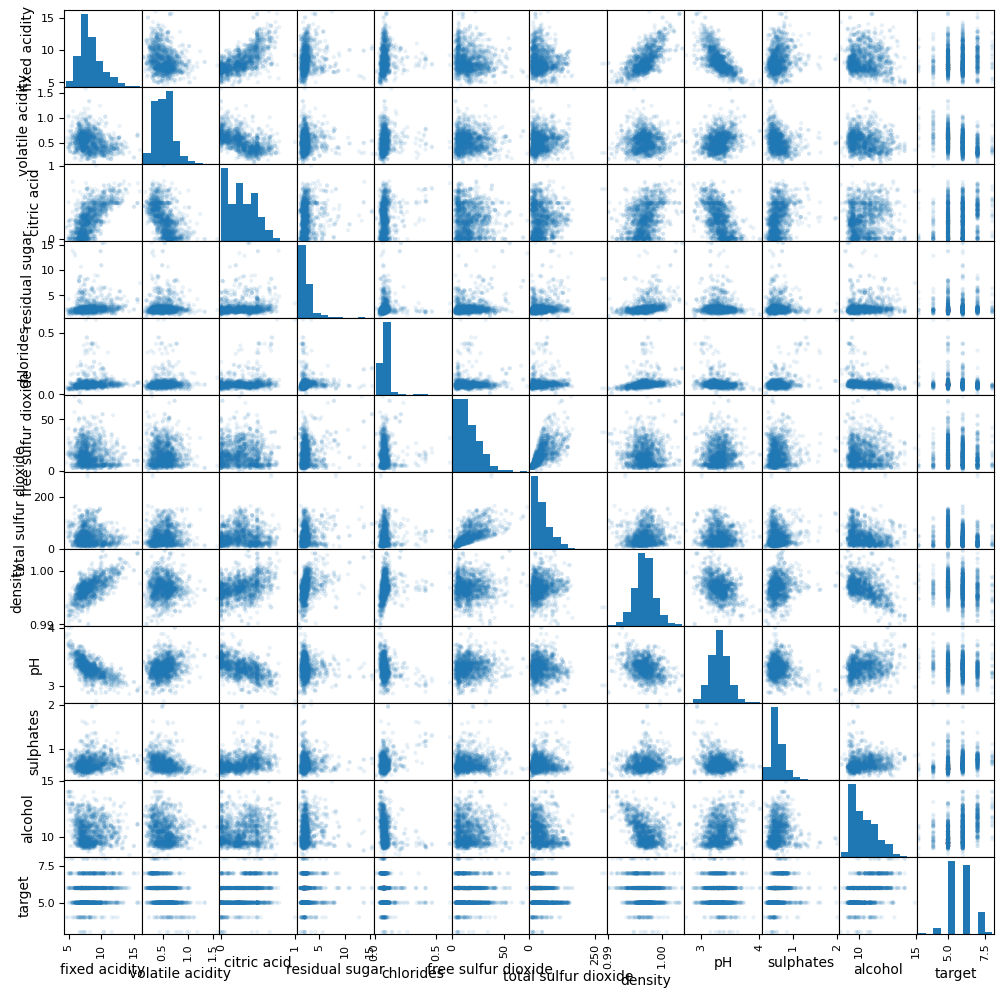

In [81]:
_=pd.plotting.scatter_matrix(dataset, figsize=(12,12),alpha=0.1)

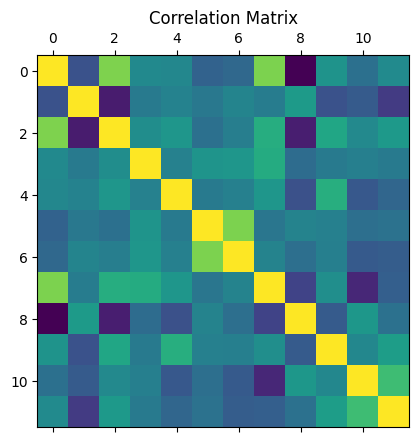

In [82]:
_=plt.matshow(dataset.corr())
_=plt.title('Correlation Matrix')

<Figure size 640x480 with 0 Axes>

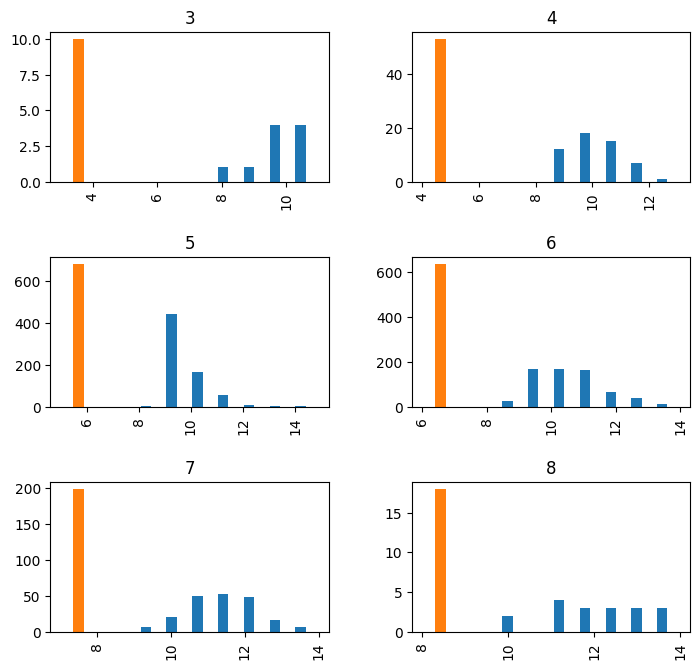

<Figure size 640x480 with 0 Axes>

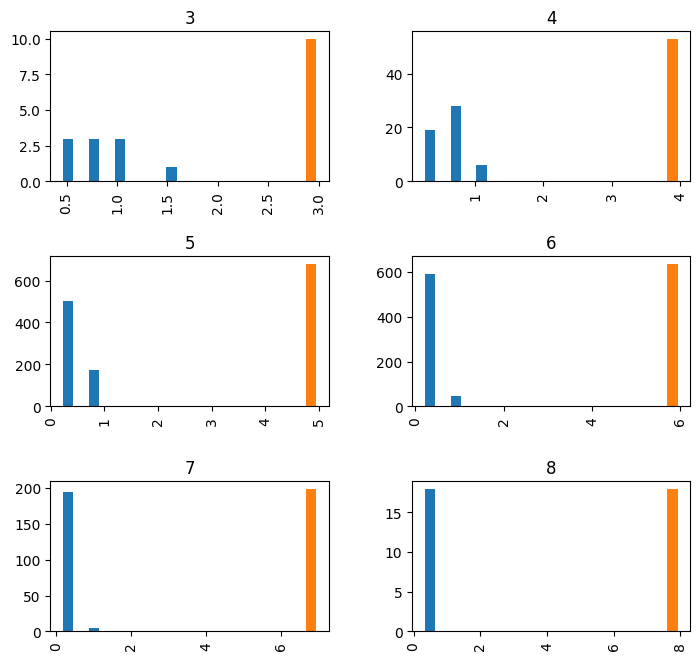

<Figure size 640x480 with 0 Axes>

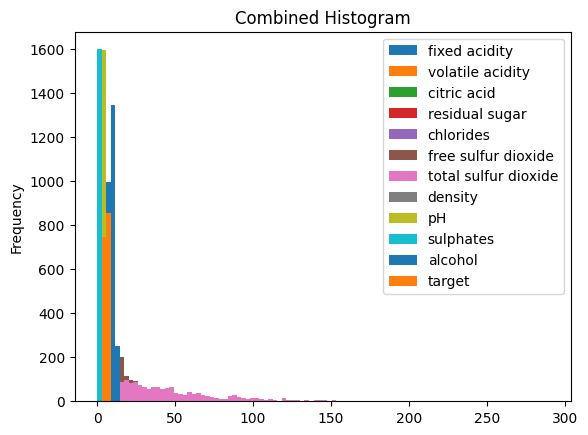

<Figure size 640x480 with 0 Axes>

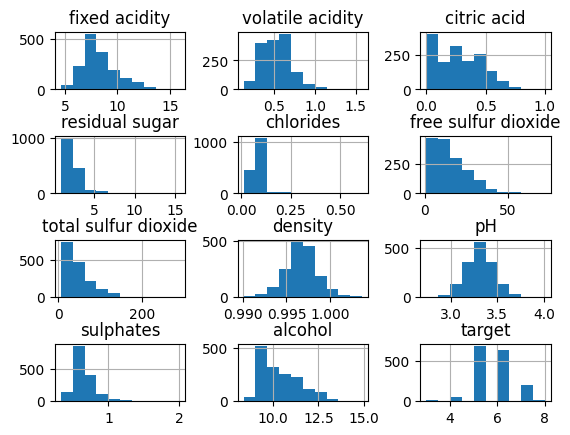

In [83]:
_=plt.figure()
_ = dataset[['alcohol','target']].hist(by="target",figsize=(8,8))
plt.Text()
_=plt.figure()
_ = dataset[['volatile acidity','target']].hist(by="target",figsize=(8,8))
_=plt.figure()
_=dataset.plot.hist(bins=100)
_=plt.title('Combined Histogram')
_=plt.figure()
_= pd.plotting.hist_frame(dataset)
plt.subplots_adjust(wspace=0.4,hspace=0.8)


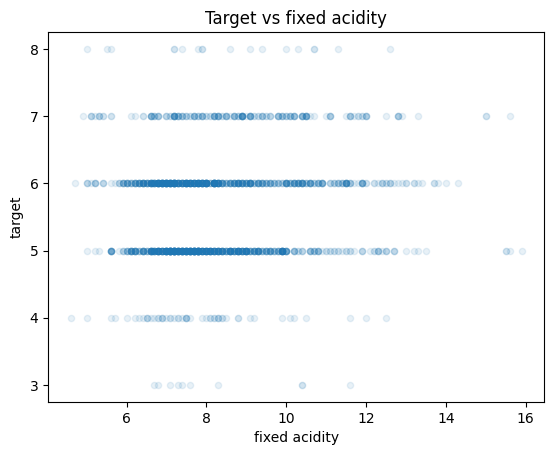

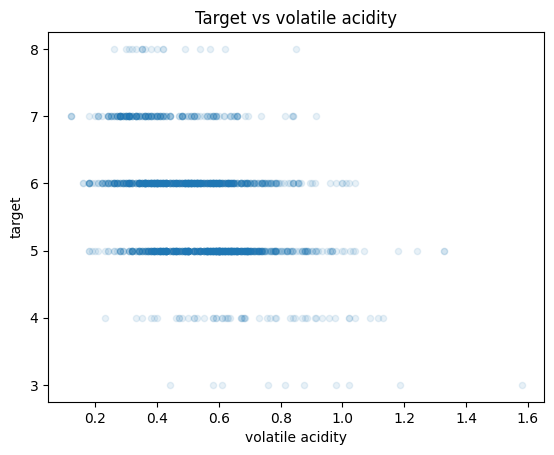

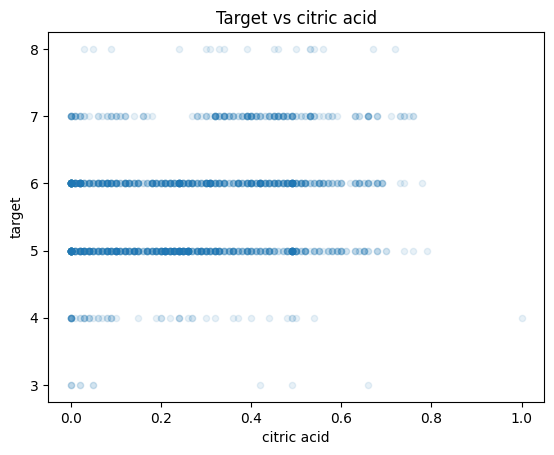

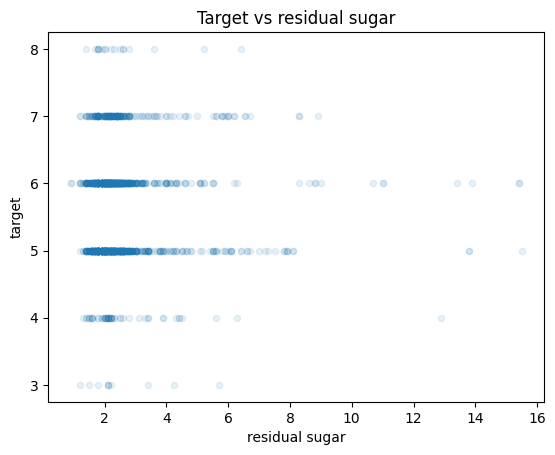

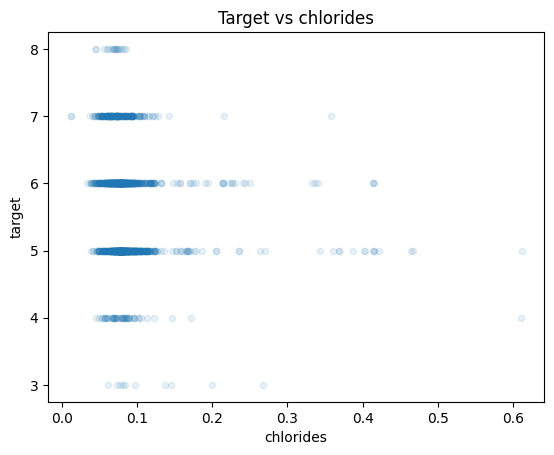

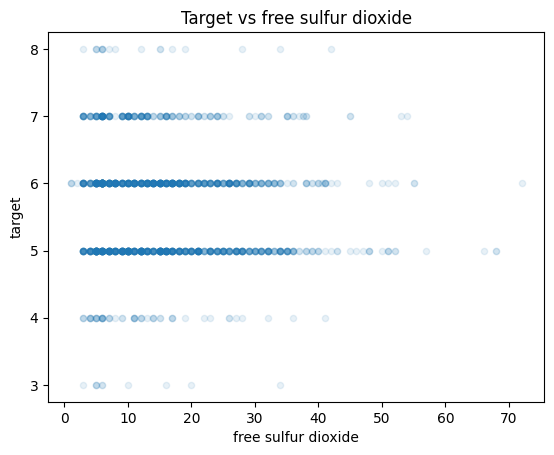

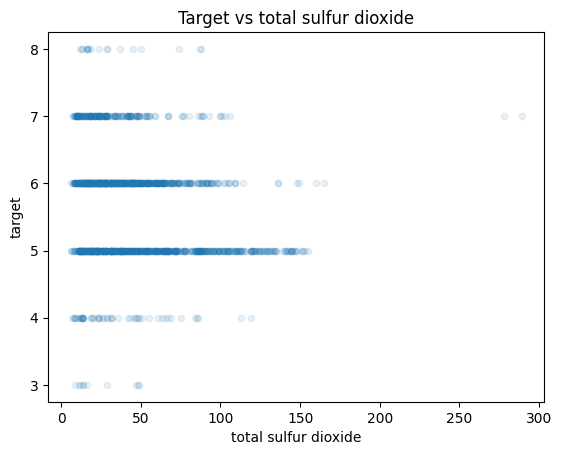

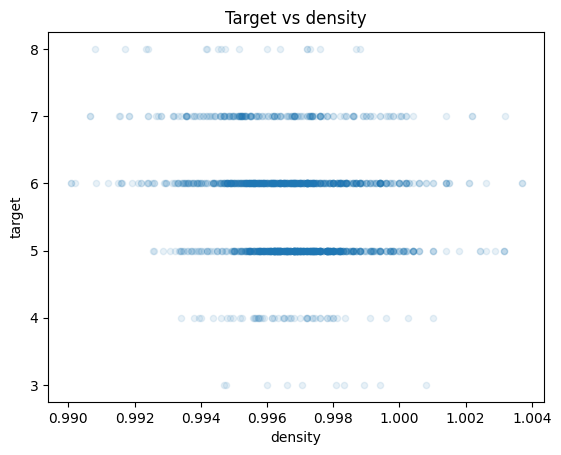

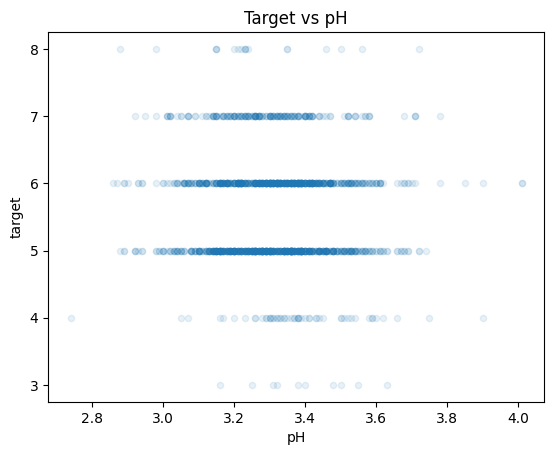

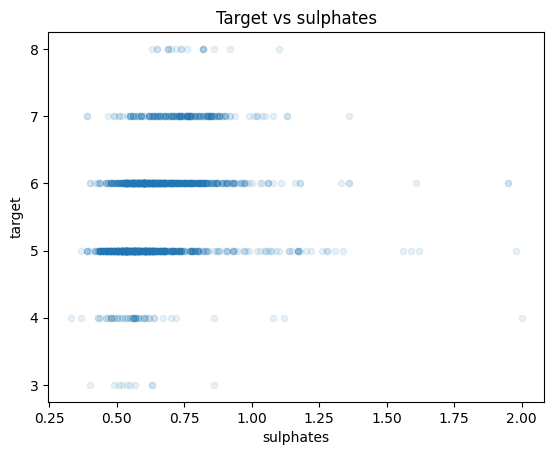

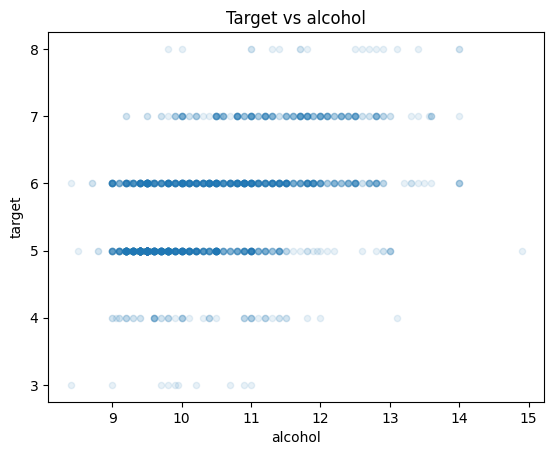

In [84]:
for c in dataset.columns:
	if c == "target":
		continue
	dataset.plot.scatter(c,"target",alpha=0.1)
	plt.title(f"Target vs {c}")

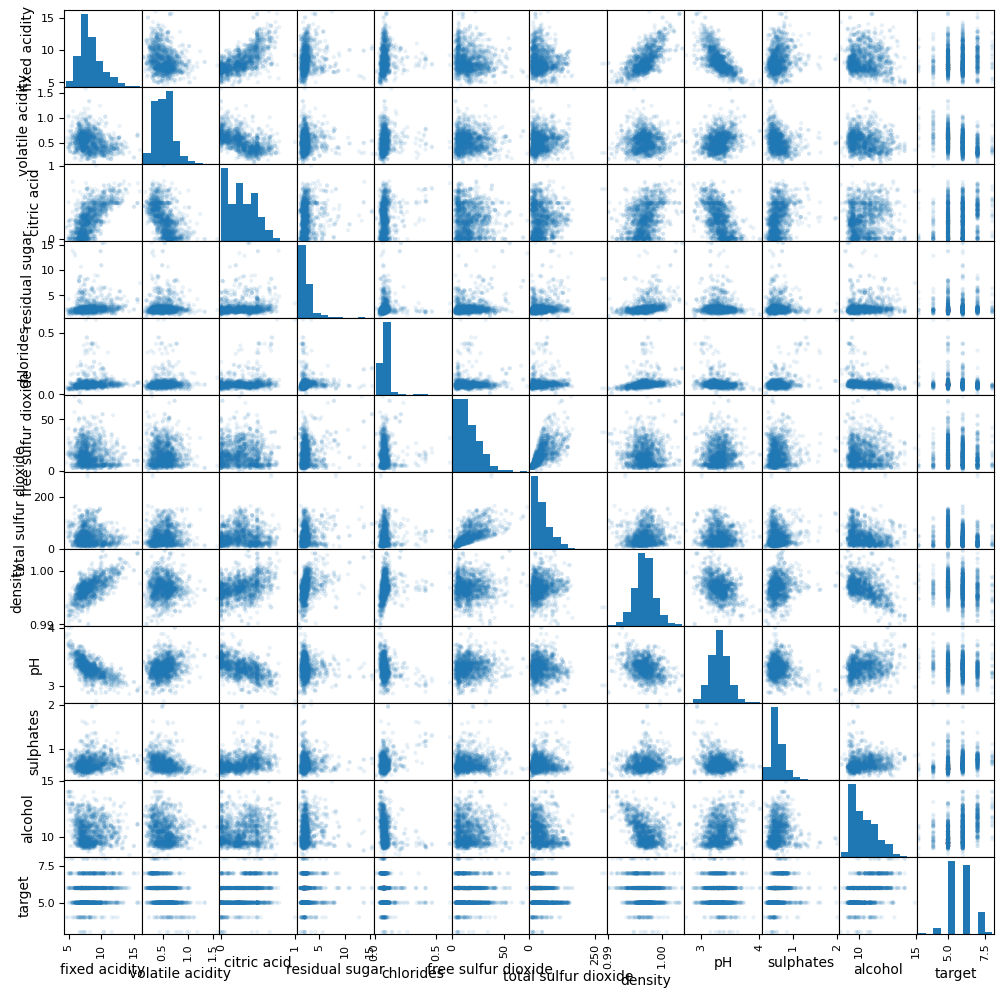

In [85]:
_=pd.plotting.scatter_matrix(dataset, figsize=(12,12),alpha=0.1)

This scatter matrix is noteworthy for the high level overview it provides of the relationships between each of the columns, as well as the distributions of each column. Citric acid has clear trends with fixed acidity, volatile acidity, and pH for instance, and density and pH are normally distributed. 

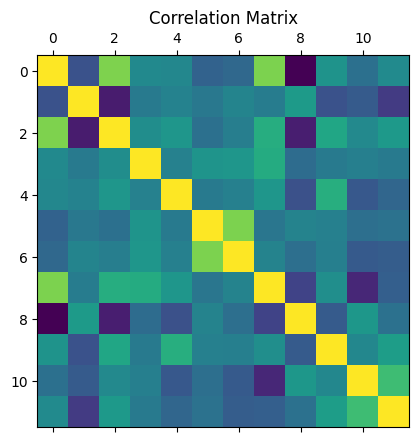

In [86]:
_=plt.matshow(dataset.corr())
_=plt.title('Correlation Matrix')

This correlation matrix is noteworthy because it gives a direct indication of positive, negative, and non-correlation between the columns of the dataset. This is complementary to the information provided by the scatter matrix. It removes some of the guessing of interpreting the scatter blobs by providing a single number, displayed as a color, that indicates the level of correlation. It indicates strong negative correlations between columns 0 and 8 (fixed acidity and pH) and columns 1 and 2 (volatile acidity and citric acid). It show strong positive correlations between columns 0 and 2 (fixed acidity and citric acid), 0 and 7 (fixed acidity and density), and columns 5 and 6 (free sulfur dioxide and total sulfur dioxide). It shows moderate positive correlation between the target (quality) and alcohol, as well as moderate negative correlation between the target and volatile acidity. 

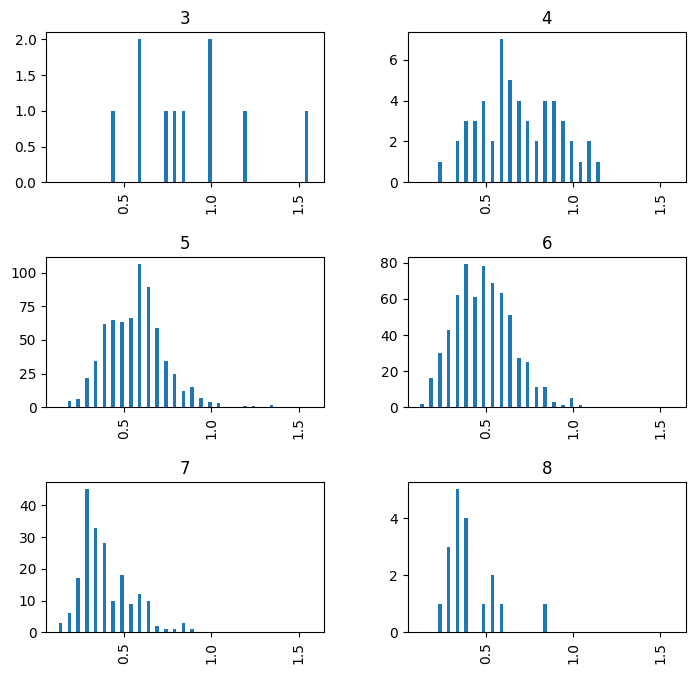

In [87]:
_ = dataset[['volatile acidity','target']].hist(by="target",figsize=(8,8),bins=np.linspace(dataset['volatile acidity'].min(),dataset['volatile acidity'].max(),30))

This series of volatile acidity histograms grouped by the target is noteworthy because it provides further insight into the negative correlation between these columns as identified in the scatter matrix and correlation matrix. It also shows that data volume is quite limited for the lowest and highest target values. The more populated target values (5, 6, and 7) show the volatile acidity histograms favoring lower values as target scores increases.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
target                     0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

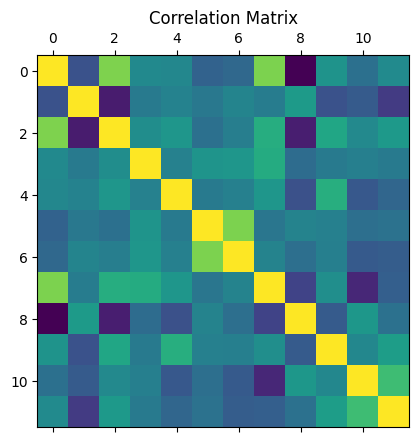

In [88]:
corrData=dataset.corr()
_=plt.matshow(corrData)
_=plt.title('Correlation Matrix')
print(corrData)

In [89]:
maxValAbs=np.zeros(len(corrData.columns))
maxVal=np.zeros(len(corrData.columns))
maxIndAbs=np.zeros(len(corrData.columns))
maxInd=np.zeros(len(corrData.columns))

for (i,col) in enumerate(dataset.columns):
    valDex=corrData[col]<1
    temp=corrData[col][valDex]
    maxVal[i]=temp.max()
    maxInd[i]=temp.argmax()
    if np.where(np.logical_not(valDex)) < maxInd[i]:
        maxInd[i]+=1
    maxValAbs[i]=temp.abs().max()
    maxIndAbs[i]=temp.abs().argmax()    
    if np.where(np.logical_not(valDex)) < maxIndAbs[i]:
        maxIndAbs[i]+=1
dataJoin=np.vstack((maxVal,maxInd,maxValAbs,maxIndAbs))
maxValDF=pd.DataFrame(dataJoin,columns=corrData.columns)

maxCol=maxValDF.iloc[0,:].idxmax()
maxColPair=maxValDF.columns[int(maxValDF[maxCol][1])]
maxCorrVal=corrData.loc[maxColPair,maxCol]

maxColAbs=maxValDF.iloc[2,:].idxmax()
maxColAbsPair=maxValDF.columns[int(maxValDF[maxColAbs][3])]
maxCorrValAbs=corrData.loc[maxColAbsPair,maxColAbs]
print(f'Largest Correlation ({maxCorrVal:.3f}): {(maxCol,maxColPair)}')
print(f'Strongest Correlation ({maxCorrValAbs:.3f}): {(maxColAbs,maxColAbsPair)}')


Largest Correlation (0.672): ('fixed acidity', 'citric acid')
Strongest Correlation (-0.683): ('fixed acidity', 'pH')


The two columns with the largest positive correlation were fixed acidity and citric acid with a correlation of ~0.672. The two columns most strongly correlated overall were fixed acidity and pH with a negative correlation of ~0.683.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

Ordinary Least Squares
1) Scikit-Learn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
2) Model Description: https://builtin.com/data-science/ols-regression

Lasso
1) Scikit-Learn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
2) Model Description:https://www.ibm.com/think/topics/lasso-regression

Bayesian
1) Scikit-Learn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge
2) Model Description: https://machinelearningmastery.com/a-gentle-introduction-to-bayesian-regression/

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

                         L1 Loss   L2 Loss
Ordinary Least Squares  0.500490  0.416767
Lasso                   0.655635  0.630355
Bayesian                0.501230  0.417463


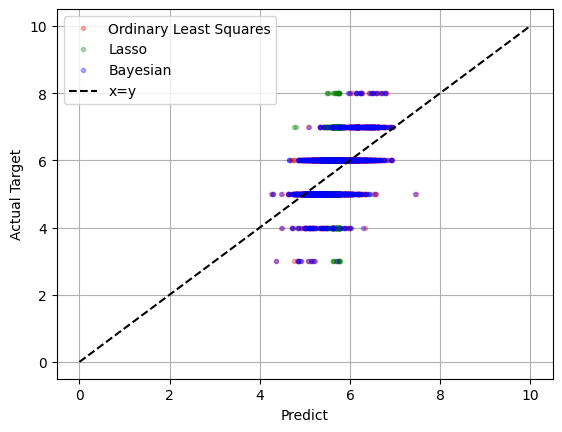

In [90]:
inputs=dataset.drop('target',axis=1)
target=dataset['target']

modelOLS=sklearn.linear_model.LinearRegression()
modelOLS.fit(inputs,target)
predictOLS=modelOLS.predict(inputs)
l1OLS=np.mean(abs(predictOLS-target))
l2OLS=np.mean((predictOLS-target)**2)

modelLasso=sklearn.linear_model.Lasso()
modelLasso.fit(inputs,target)
predictLasso=modelLasso.predict(inputs)
l1Lasso=np.mean(abs(predictLasso-target))
l2Lasso=np.mean((predictLasso-target)**2)

modelBayes=sklearn.linear_model.BayesianRidge()
modelBayes.fit(inputs,target)
predictBayes=modelBayes.predict(inputs)
l1Bayes=np.mean(abs(predictBayes-target))
l2Bayes=np.mean((predictBayes-target)**2)

plt.figure()
plt.plot(predictOLS,target,'r.',alpha=0.3)
plt.plot(predictLasso,target,'g.',alpha=0.3)
plt.plot(predictBayes,target,'b.',alpha=0.3)
plt.plot([0,10],[0,10],'k--')
plt.legend(['Ordinary Least Squares', 'Lasso', 'Bayesian','x=y'])
plt.xlabel('Predict')
plt.ylabel('Actual Target')
plt.grid()

losses=[[l1OLS,l2OLS],
        [l1Lasso,l2Lasso],
        [l1Bayes,l2Bayes],
        ]
lossesDF=pd.DataFrame(losses,columns=['L1 Loss','L2 Loss'],index=['Ordinary Least Squares','Lasso','Bayesian'])
print(lossesDF)

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [91]:
from sklearn.model_selection import cross_validate #instructor stated this acceptable on Piazza
OLScv = cross_validate(modelOLS, inputs, target, cv=5, scoring='neg_mean_squared_error')
meanOLScvL2=np.mean((abs(OLScv['test_score'])))
Lassocv = cross_validate(modelLasso, inputs, target, cv=5, scoring='neg_mean_squared_error')
meanLassocvL2=np.mean((abs(Lassocv['test_score'])))
Bayescv = cross_validate(modelBayes, inputs, target, cv=5, scoring='neg_mean_squared_error')
meanBayescvL2=np.mean((abs(Bayescv['test_score'])))

lossCompare=[[l2OLS,meanOLScvL2],
        [l2Lasso,meanLassocvL2],
        [l2Bayes,meanBayescvL2],
        ]

lossCompareDF=pd.DataFrame(lossCompare,columns=['L2 Loss All Data','L2 Loss 5-Fold CV'],index=['Ordinary Least Squares','Lasso','Bayesian'])
print(lossCompareDF)

                        L2 Loss All Data  L2 Loss 5-Fold CV
Ordinary Least Squares          0.416767           0.436629
Lasso                           0.630355           0.647115
Bayesian                        0.417463           0.436755


The 5-fold cross validation shows worse L2 scores as expected, however the differences are minor which is a positive indication that the model will generalize well. 

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [92]:
from sklearn.pipeline import make_pipeline #instructor stated this acceptable on Piazza
from sklearn.preprocessing import StandardScaler #instructor stated this acceptable on Piazza
OLSPipeline = make_pipeline(StandardScaler(),sklearn.linear_model.LinearRegression())
OLSPipeline.fit(inputs,target)
predictOLSPipeline=OLSPipeline.predict(inputs)
l2OLSPipeline=np.mean((predictOLSPipeline-target)**2)

LassoPipeline = make_pipeline(StandardScaler(),sklearn.linear_model.Lasso())
LassoPipeline.fit(inputs,target)
predictLassoPipeline=LassoPipeline.predict(inputs)
l2LassoPipeline=np.mean((predictLassoPipeline-target)**2)

BayesPipeline = make_pipeline(StandardScaler(),sklearn.linear_model.BayesianRidge())
BayesPipeline.fit(inputs,target)
predictBayesPipeline=BayesPipeline.predict(inputs)
l2BayesPipeline=np.mean((predictBayesPipeline-target)**2)

lossComparePipeline=[[l2OLS,l2OLSPipeline],
        [l2Lasso,l2LassoPipeline],
        [l2Bayes,l2BayesPipeline],
        ]

lossComparePipelineDF=pd.DataFrame(lossComparePipeline,columns=['L2 Loss Raw','L2 Loss Standardized'],index=['Ordinary Least Squares','Lasso','Bayesian'])
print(lossComparePipelineDF)

                        L2 Loss Raw  L2 Loss Standardized
Ordinary Least Squares     0.416767              0.416767
Lasso                      0.630355              0.651761
Bayesian                   0.417463              0.416832


Ordinary least squares regression had no difference in L2 loss, while Lasso had slightly worse L2 loss, and Bayesian had slightly better L2 loss.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

This approach will result in training a very large number of models, there are more efficient methods for right sizing the complexity of a decision tree.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

Three regression models were considered in this effort, with and without standardization. They were Ordinary Least Squares Regression, Lasso Regression, and Bayesian Regression. Based on comparison of L2 loss I consider the "best" model to be Ordinary Least Squares Regression, though Bayesian Regression offered similar performance. Conversely, Lasso Regression had worse L2 scores. Ordinary Least Squares Regression and Bayesian Regression showed a similar small increase in L2 loss as a result of 5-fold cross validation. Both should generalize similarly well. There is no need to standardize the data for Ordinary Least Squares regression. Due to its performance and simplicity I consider Ordinary Least Squares Regression to be the best choice for this dataset of the three models considered. If however there was interest in understanding the uncertainty of the target prediction, Bayesian Regression would be the best of the three models as it provides that information. A winemaker may want to know the uncertainty in the quality prediction as they consider whether to invest in better grapes for instance. 